# LMNA

In [1]:
import genophenocorr
print(f"Using genophenocorr version {genophenocorr.__version__}")

Using genophenocorr version 0.1.1dev


In [2]:
import hpotk

fpath_hpo = 'https://github.com/obophenotype/human-phenotype-ontology/releases/download/v2024-02-08/hp.json'
hpo = hpotk.load_minimal_ontology(fpath_hpo)

In [3]:
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder

fpath_phenopackets = 'input/'
cohort_creator = configure_caching_cohort_creator(hpo)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)

Patients Created: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 127/127 [00:00<00:00, 526.18it/s]
Validated under none policy
No errors or warnings were found


## Transcript
Get it by looking for gene symbol in https://www.ncbi.nlm.nih.gov/clinvar/ look for pathogenic
zcopy it and go to https://variantvalidator.org/service/validate/, then scroll down to copy GRCH38 string, copy this and put into same website

looking for MANE select plus clinical (most important transcript for clinic) if doesnt exist, use clinvar result

In [4]:
tx_id = 'NM_170707.4'

## Explore Cohort

In [5]:
from IPython.display import HTML, display
from genophenocorr.view import CohortViewable

viewer = CohortViewable(hpo)

In [6]:
display(HTML(viewer.process(cohort, tx_id)))

HPO Term,ID,Annotation Count
Ankle contracture,HP:0034677,39
Elbow contracture,HP:0034391,37
Spinal rigidity,HP:0003306,37
Stiff neck,HP:0025258,36
Proximal muscle weakness in upper limbs,HP:0008997,35
Dilated cardiomyopathy,HP:0001644,27
Atrial fibrillation,HP:0005110,25
Arrhythmia,HP:0011675,23
Lipodystrophy,HP:0009125,21
Distal lower limb muscle weakness,HP:0009053,21


In [7]:
from genophenocorr.view import DiseaseViewable

dis_view = DiseaseViewable(hpo, transcript_id=tx_id)
dis_dict = dis_view._prepare_context(cohort)
display(HTML(dis_view.process(cohort)))

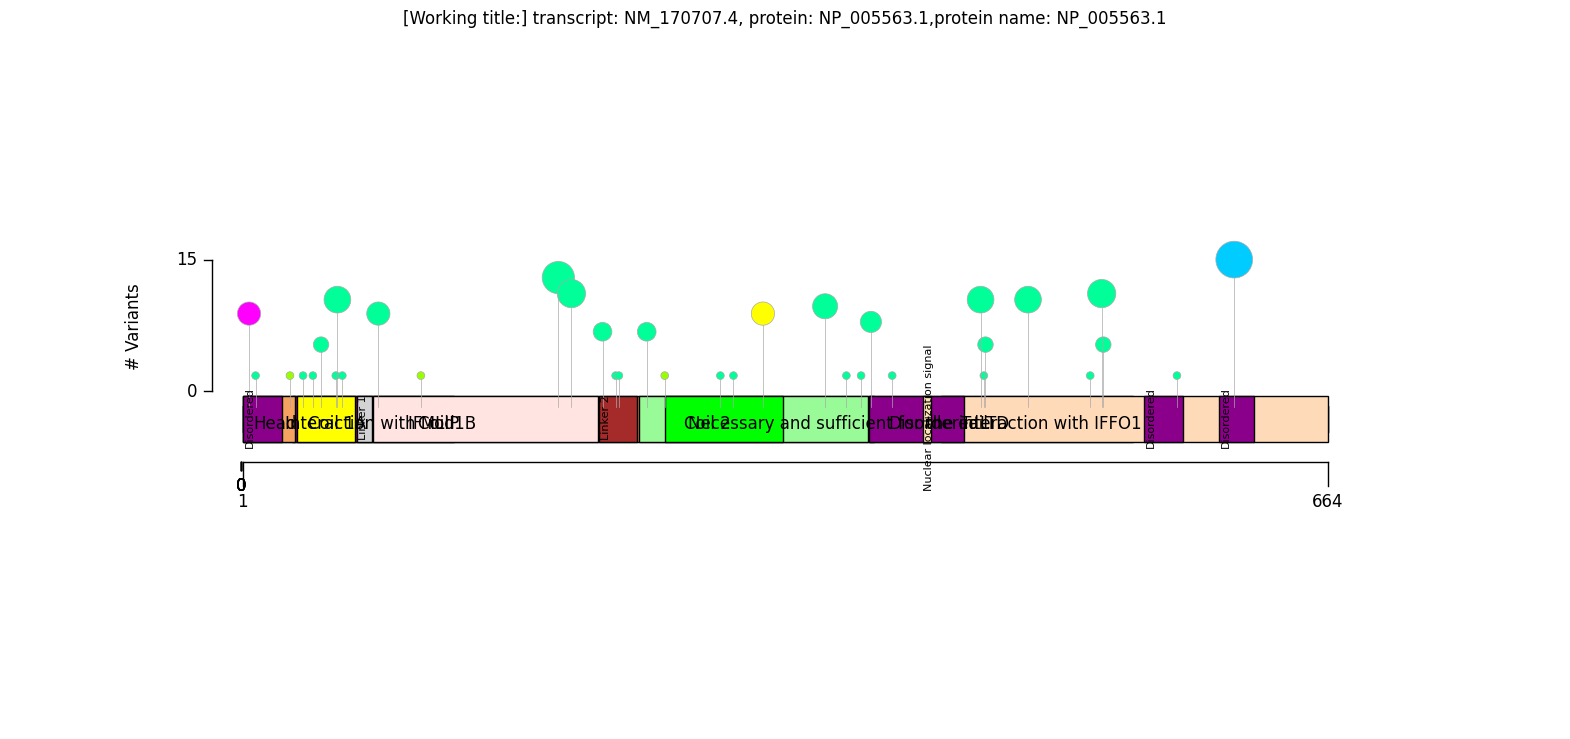

In [15]:
from genophenocorr.preprocessing import UniprotProteinMetadataService
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate('NP_005563.1')
txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(tx_id)
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate('NP_005563.1')
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer
protein_meta = protein_metas[0]
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Configure the analysis

In [19]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)


In [20]:
from genophenocorr.model import VariantEffect
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.analysis.predicate.genotype import VariantEffectPredicate

by_missense = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=tx_id)
by_missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_170707.4                       Yes             No  \
                                                    Count Percent  Count   
Lipodystrophy [HP:0009125]                          10/75     13%  15/35   
Proptosis [HP:0000520]                                0/3      0%  15/15   
Alopecia [HP:0001596]                                 0/3      0%  15/15   
Prominent superficial blood vessels [HP:0007394]      0/3      0%  15/15   
Reduced subcutaneous adipose tissue [HP:0003758]      0/3      0%  15/15   
...                                                   ...     ...    ...   
Finger joint contracture [HP:0034681]                 1/1    100%    1/1   
Abnormality of upper limb joint [HP:0009810]          5/5    100%    1/1   
Abnormality of the hand [HP:0001155]                  1/1    100%  16/16   
Abnormal circulating lipid concentration [HP:00...  12/12    100%    0/0   
Abnormality of the musculoskeletal system [HP:0...  59/59    100%  26/26   

MISSENSE_VARIANT on NM_170707.4                                       \
                                                   Percent   p value   
Lipodystrophy [HP:0009125]                             43%  0.001167   
Proptosis [HP:0000520]                                100%  0.001225   
Alopecia [HP:0001596]                                 100%  0.001225   
Prominent superficial blood vessels [HP:0007394]      100%  0.001225   
Reduced subcutaneous adipose tissue [HP:0003758]      100%  0.001225   
...                                                    ...       ...   
Finger joint contracture [HP:0034681]                 100%  1.000000   
Abnormality of upper limb joint [HP:0009810]          100%  1.000000   
Abnormality of the hand [HP:0001155]                  100%  1.000000   
Abnormal circulating lipid concentration [HP:00...      0%  1.000000   
Abnormality of the musculoskeletal system [HP:0...    100%  1.000000   

MISSENSE_VARIANT on NM_170707.4                                       
                                                   Corrected p value  
Lipodystrophy [HP:0009125]                                  0.079657  
Proptosis [HP:0000520]                                      0.079657  
Alopecia [HP:0001596]                                       0.079657  
Prominent superficial blood vessels [HP:0007394]            0.079657  
Reduced subcutaneous adipose tissue [HP:0003758]            0.079657  
...                                                              ...  
Finger joint contracture [HP:0034681]                       1.000000  
Abnormality of upper limb joint [HP:0009810]                1.000000  
Abnormality of the hand [HP:0001155]                        1.000000  
Abnormal circulating lipid concentration [HP:00...          1.000000  
Abnormality of the musculoskeletal system [HP:0...          1.000000  

[455 rows x 6 columns]

In [21]:
by_dis = analysis.compare_disease_vs_genotype(VariantEffectPredicate(transcript_id=tx_id, effect=VariantEffect.MISSENSE_VARIANT))
by_dis.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_170707.4    Yes             No                        \
                                 Count Percent  Count Percent       p value   
OMIM:176670                       0/90      0%  15/37     41%  8.025624e-10   
OMIM:151660                      12/90     13%   0/37      0%  1.807470e-02   
OMIM:181350                      34/90     38%   7/37     19%  5.904112e-02   
OMIM:613205                      13/90     14%   2/37      5%  2.276691e-01   
OMIM:115200                      31/90     34%  13/37     35%  1.000000e+00   

MISSENSE_VARIANT on NM_170707.4                    
                                Corrected p value  
OMIM:176670                          4.012812e-09  
OMIM:151660                          4.518674e-02  
OMIM:181350                          9.840187e-02  
OMIM:613205                          2.845863e-01  
OMIM:115200                          1.000000e+00

In [22]:
by_var = analysis.compare_by_variant_key(variant_key='1_156138613_156138613_C_T')
by_var.summarize(hpo, PatientCategories.YES)

>=1 allele of the variant 1_156138613_156138613_C_T    Yes             No  \
                                                     Count Percent  Count   
Lipodystrophy [HP:0009125]                           15/15    100%  10/95   
Proptosis [HP:0000520]                               15/15    100%    0/3   
Alopecia [HP:0001596]                                15/15    100%    0/3   
Prominent superficial blood vessels [HP:0007394]     15/15    100%    0/3   
Reduced subcutaneous adipose tissue [HP:0003758]     15/15    100%    0/3   
...                                                    ...     ...    ...   
Finger joint contracture [HP:0034681]                  0/0      0%    2/2   
Abnormality of upper limb joint [HP:0009810]           0/0      0%    6/6   
Abnormality of the hand [HP:0001155]                 15/15    100%    2/2   
Abnormal circulating lipid concentration [HP:00...     0/0      0%  12/12   
Abnormality of the musculoskeletal system [HP:0...   15/15    100%  70/70   

>=1 allele of the variant 1_156138613_156138613_C_T                        \
                                                    Percent       p value   
Lipodystrophy [HP:0009125]                              11%  2.780126e-12   
Proptosis [HP:0000520]                                   0%  1.225490e-03   
Alopecia [HP:0001596]                                    0%  1.225490e-03   
Prominent superficial blood vessels [HP:0007394]         0%  1.225490e-03   
Reduced subcutaneous adipose tissue [HP:0003758]         0%  1.225490e-03   
...                                                     ...           ...   
Finger joint contracture [HP:0034681]                  100%  1.000000e+00   
Abnormality of upper limb joint [HP:0009810]           100%  1.000000e+00   
Abnormality of the hand [HP:0001155]                   100%  1.000000e+00   
Abnormal circulating lipid concentration [HP:00...     100%  1.000000e+00   
Abnormality of the musculoskeletal system [HP:0...     100%  1.000000e+00   

>=1 allele of the variant 1_156138613_156138613_C_T                    
                                                    Corrected p value  
Lipodystrophy [HP:0009125]                               1.264957e-09  
Proptosis [HP:0000520]                                   7.965686e-02  
Alopecia [HP:0001596]                                    7.965686e-02  
Prominent superficial blood vessels [HP:0007394]         7.965686e-02  
Reduced subcutaneous adipose tissue [HP:0003758]         7.965686e-02  
...                                                               ...  
Finger joint contracture [HP:0034681]                    1.000000e+00  
Abnormality of upper limb joint [HP:0009810]             1.000000e+00  
Abnormality of the hand [HP:0001155]                     1.000000e+00  
Abnormal circulating lipid concentration [HP:00...       1.000000e+00  
Abnormality of the musculoskeletal system [HP:0...       1.000000e+00  

[455 rows x 6 columns]